
# Classificação de Grãos de Trigo com Machine Learning

Neste projeto, aplicamos a metodologia **CRISP-DM** para desenvolver um modelo de aprendizado de máquina capaz de classificar variedades de grãos de trigo com base em características físicas, utilizando o conjunto de dados *Seeds Dataset* do UCI Machine Learning Repository.



## Metodologia CRISP-DM

Seguiremos as seguintes etapas da metodologia CRISP-DM:

1. Entendimento do Negócio
2. Entendimento dos Dados
3. Preparação dos Dados
4. Modelagem
5. Avaliação
6. Implantação (teórica)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Carregar os dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth',
           'AsymmetryCoeff', 'KernelGrooveLength', 'Class']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

df.head()


<ipython-input-1-3691859876>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoeff,KernelGrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:

df.describe()


,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoeff,KernelGrooveLength,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


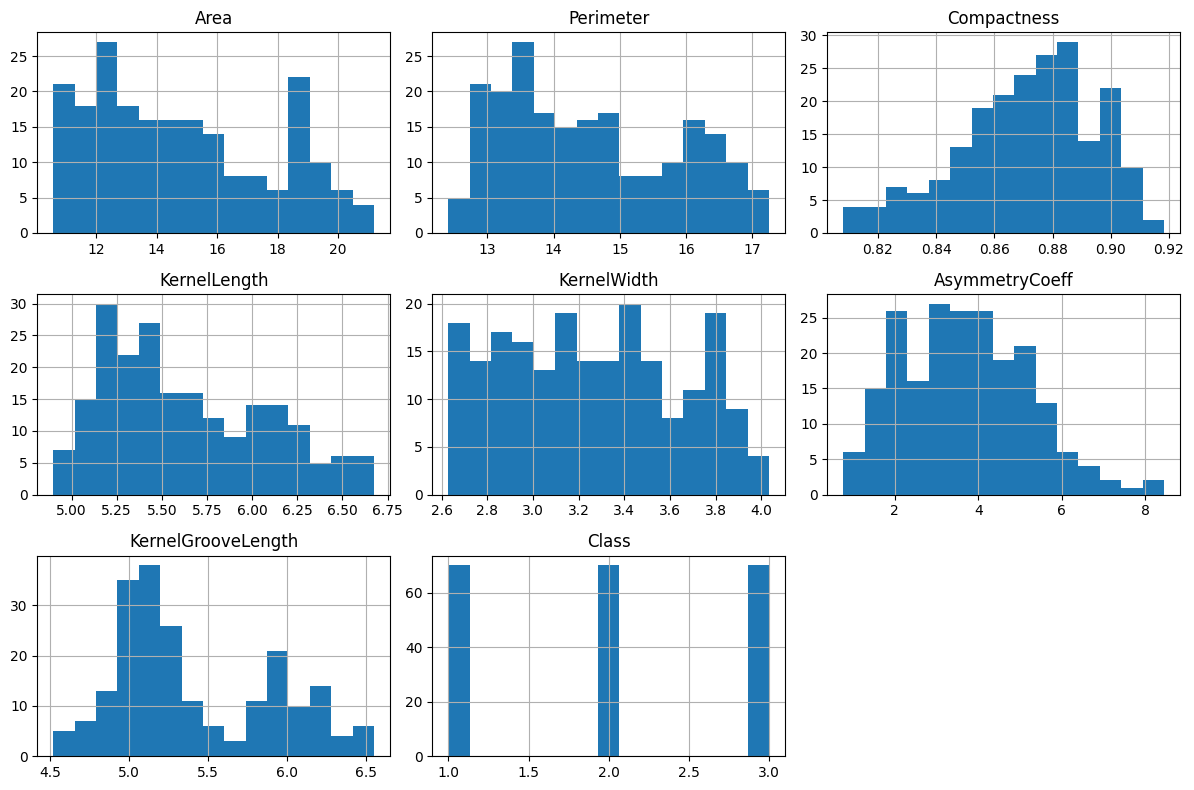

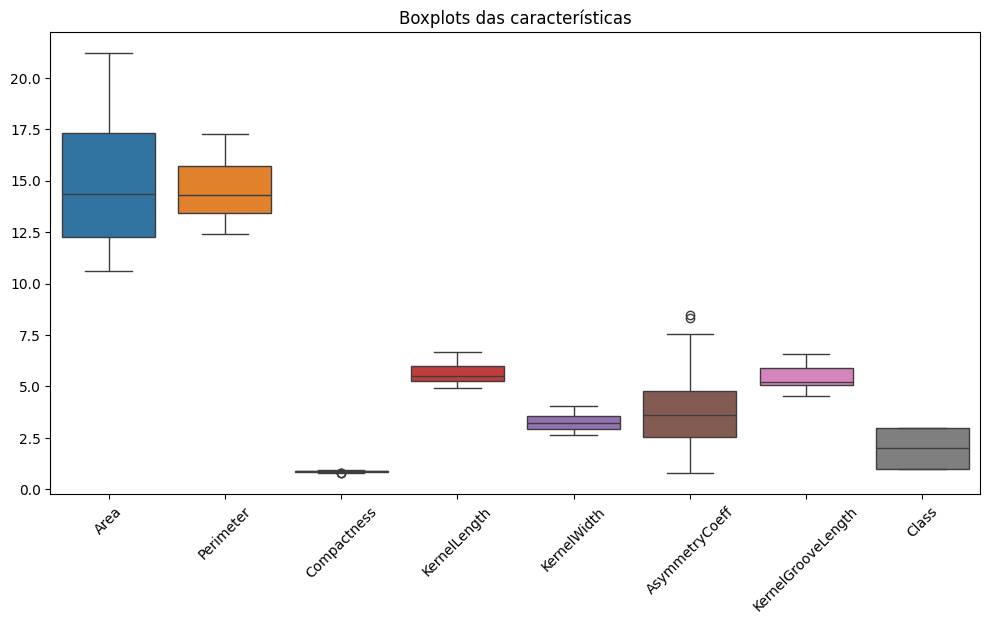

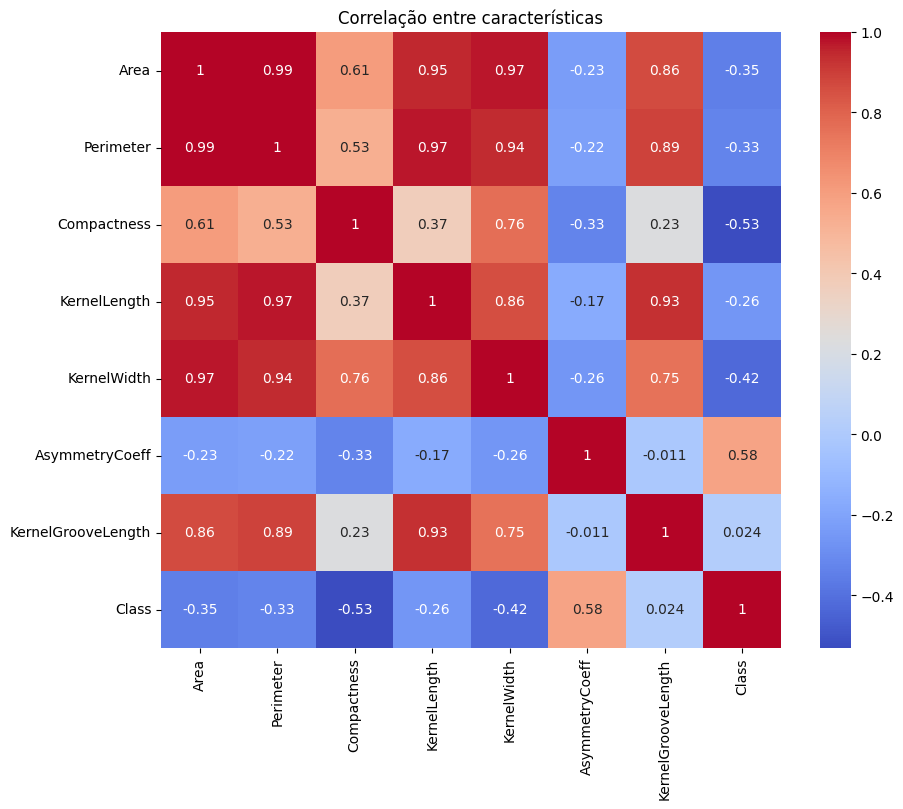

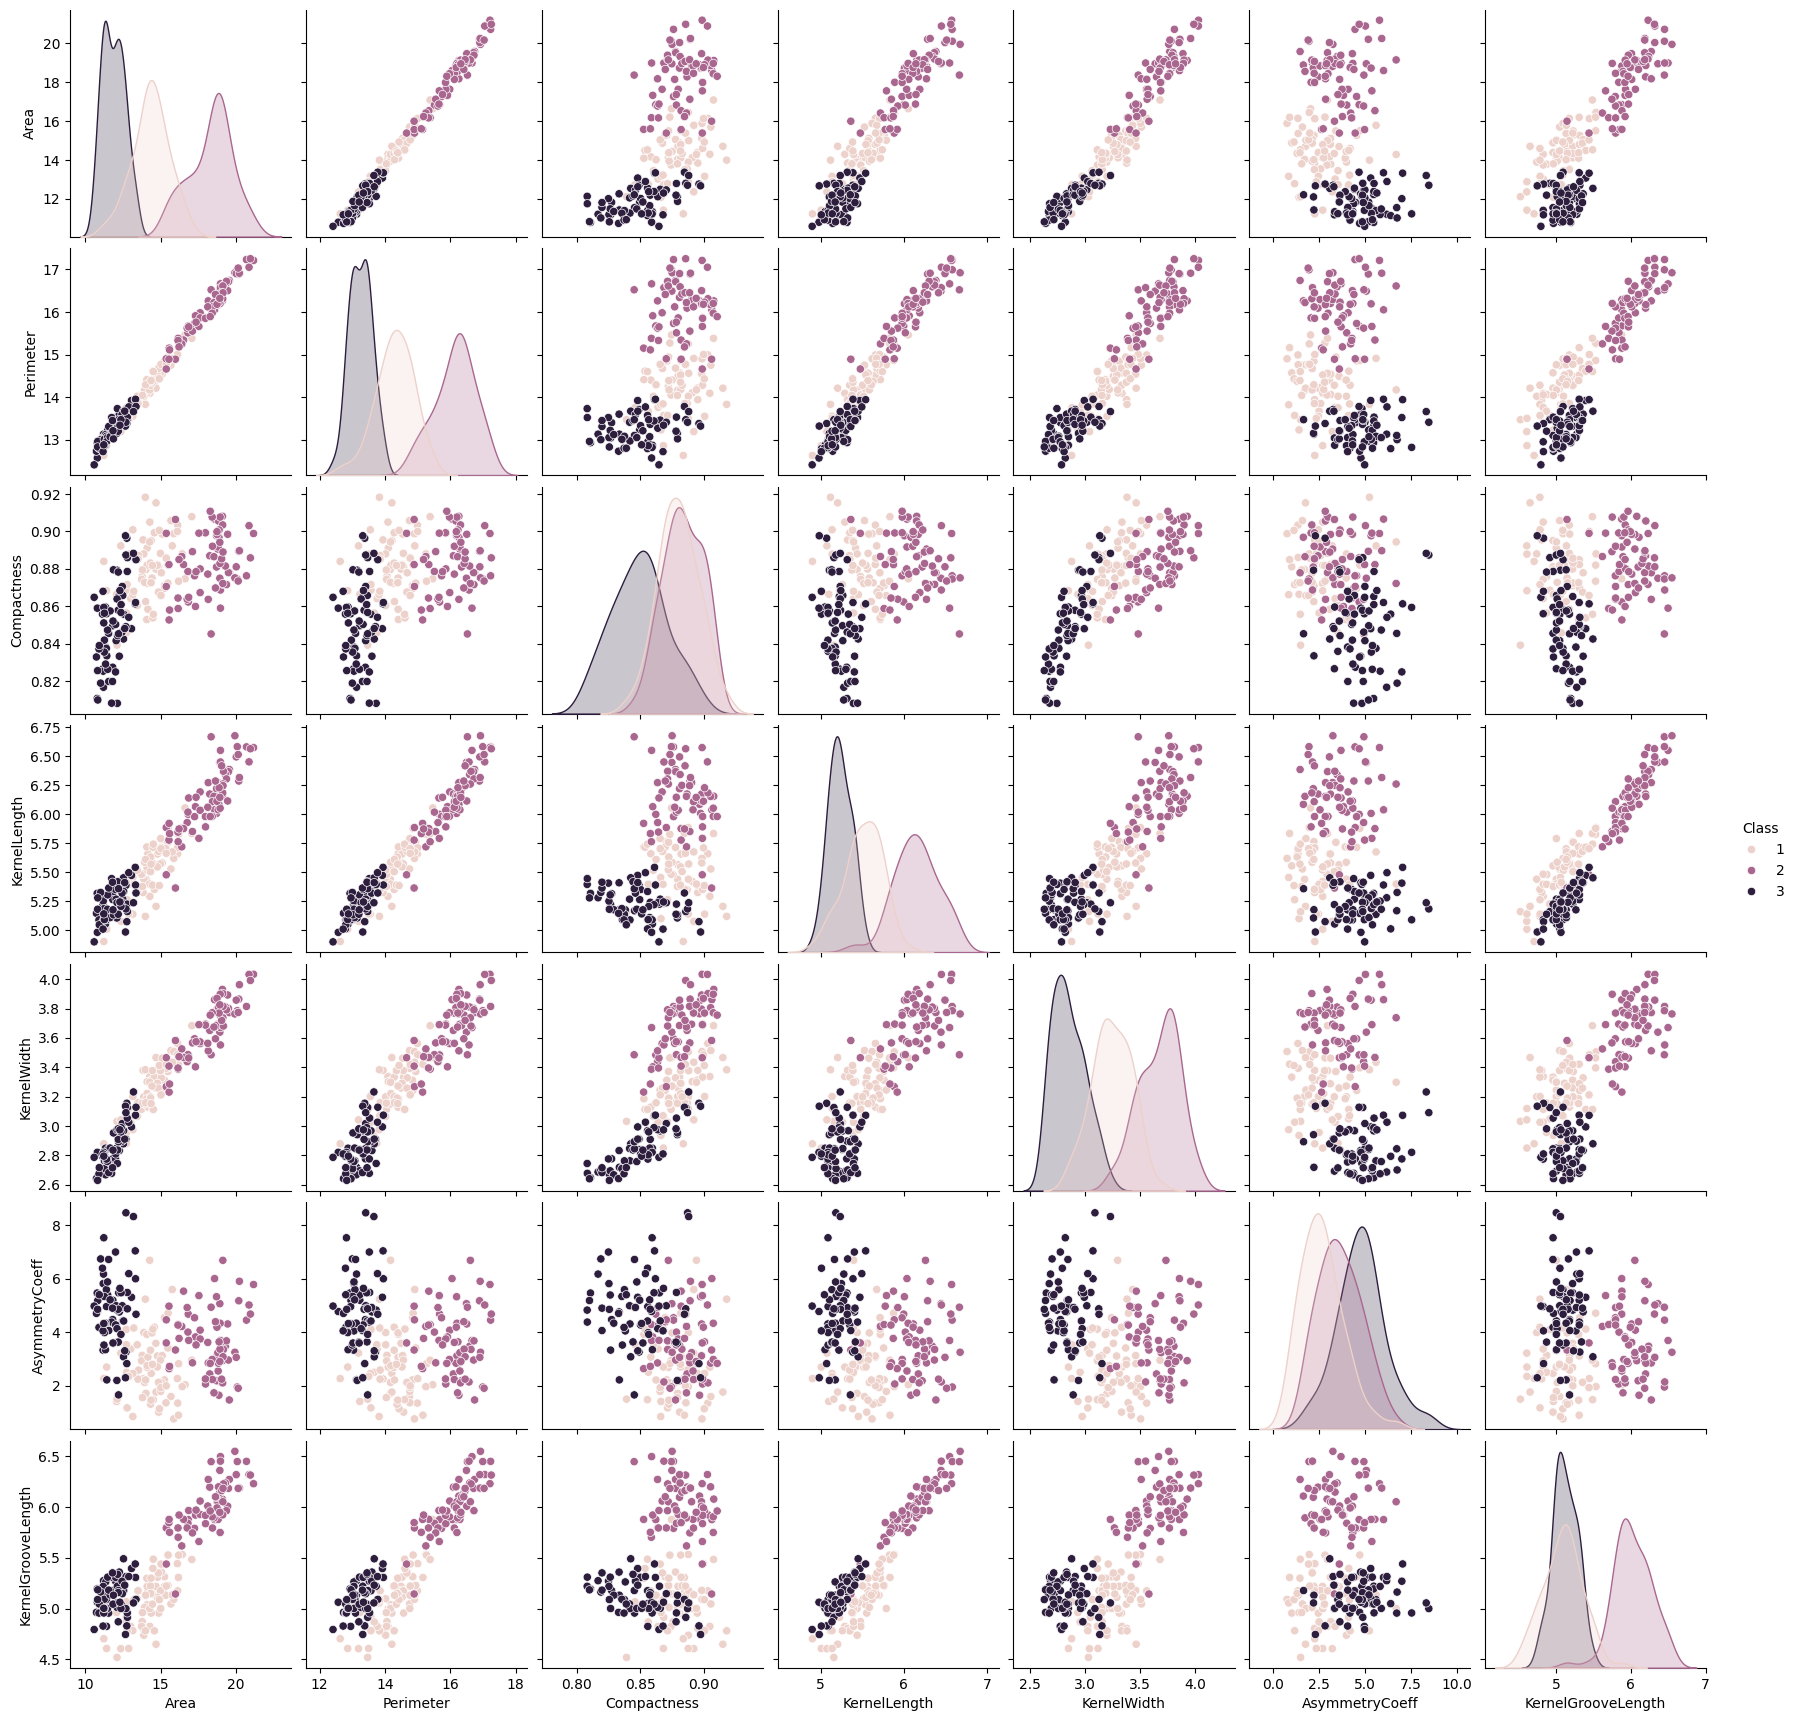

In [ ]:

df.hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots das características")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre características")
plt.show()

sns.pairplot(df, hue='Class')
plt.show()


In [ ]:

print(df.isnull().sum())  # Verificando valores ausentes

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Area                  0
Perimeter             0
Compactness           0
KernelLength          0
KernelWidth           0
AsymmetryCoeff        0
KernelGrooveLength    0
Class                 0
dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:

models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- KNN ---
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

--- SVM ---
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

--- Random Forest ---
[[17  0  3]
 [ 1 20  0]
 [ 4  0 18]]
              precision    recall  f1-score   support

           1       0.77   

In [ ]:

param_grid_knn = {'n_neighbors': range(1, 20)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Melhor parâmetro para KNN:", grid_knn.best_params_)

y_pred_opt = grid_knn.predict(X_test)
print(classification_report(y_test, y_pred_opt))


Melhor parâmetro para KNN: {'n_neighbors': 5}
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63




## Conclusão

- Foram comparados 5 modelos de classificação.
- A normalização dos dados melhorou o desempenho dos modelos.
- A técnica de otimização de hiperparâmetros (GridSearch) foi aplicada para o KNN.
- É possível aplicar esse modelo para auxiliar cooperativas agrícolas a classificarem grãos de forma automática, rápida e com boa precisão.
